<div style="border:solid black 2px; padding: 20px">
<b>Александр, привет!</b>

Меня зовут Полина Бережная, и я буду делать ревью проекта по машинному обучению. Давай будем общаться на «ты». Но если тебе комфортнее на «вы», обязательно сообщи мне об этом. 

Мне было очень приятно проверять твой проект, так как чувствуется твое старание и желание сделать задание на достойном уровне. Однако есть некоторые аспекты, которые требуют твоего внимания и доработки. 
    
В тетрадке ты можешь встретить 3 вида моих комментариев:
- <div class="alert alert-danger">
  
    **Комментарий ревьюера**
    
    Такой нюанс требует обязательной доработки, иначе проект не будет принят.
  </div>
    
    
- <div class="alert alert-warning">
  
    **Комментарий ревьюера**
    
    Так выделены не обязательные к доработке моменты. Mожешь учесть их при редактировании проекта и выполнении будущих заданий. На твое усмотрение. 
  </div>
    
    
- <div class="alert alert-success">
  
    **Комментарий ревьюера**
    
    Так отмечены удачные решения и подходы, на которые стоит опираться в будущих проектах.
  </div>
    

    

Предлагаю работать над проектом в форме диалога: если ты **что-то меняешь** в работе по моим рекомендациям — **пиши об этом** и помечай комментарий каким-то заметным цветом. Пожалуйста, **не перемещай, не изменяй и не удаляй мои комментарии**. Такой формат работы поможет выполнить повторную проверку твоего проекта оперативнее.
    
Не переживай, если что-то не получилось сделать идеально с первого раза. Основная цель нашей команды - не указать на ошибки, а поделиться своим опытом и помочь тебе отточить аналитические навыки и навыки владения аналитическими инструментами 🙂
    
Жду твой проект на повторное ревью, ты уже почти на финише!

</div>

 <strong><em><h1> Cборный проект 
    
  'Стратегия взаимодействия с клиентами на основе аналитических данных '
  </em></strong></h1>

<h3>  Импорт библиотек <h3> 

In [1]:
import pandas as pd
import scipy.stats as st
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from plotly import graph_objects as go
import seaborn as sns
import math as mth
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
import itertools
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

 <b><h2>  Описание проекта <h2> </b> 
Проведем анализ оттока клиентов в фитнесс-клубе и подготовим план действий по удержанию клиентов.
    
 Для этого:
    
1) научимся прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
    
2) сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
    
3) проанализировать основные признаки, наиболее сильно влияющие на отток;
    
4) сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
    
>а) выделить целевые группы клиентов;
    
>б) предложить меры по снижению оттока;
    
>в) определить другие особенности взаимодействия с клиентами.
    


 <strong><em><h2> Шаг 1. Загружаем данные

  </em></strong></h2>

In [2]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/gym_churn.csv')
data.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


 <strong><em><h2> Шаг 2. Проводим исследовательский анализ данных (EDA)

  </em></strong></h2>


    Посмотрим на датасет: 
    
-есть ли в нем отсутствующие признаки, изучим средние значения и стандартные отклонения (используем метод describe())
    
-посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался (воспользуемся методом groupby())
    
-построим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)
    
-построим матрицу корреляций и отобразим её.


 
  
-просмотрим отсутствующ
    ие признаки, изучим средние значения и стандартные отклонения (используем метод describe())



In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [4]:
data['gender'].unique()

array([1, 0])

In [5]:
data['Near_Location'].unique()

array([1, 0])

In [6]:
data['Partner'].unique()

array([1, 0])

In [7]:
data['Promo_friends'].unique()

array([1, 0])

In [8]:
data['Phone'].unique()

array([0, 1])

In [9]:
data['Contract_period'].unique()

array([ 6, 12,  1])

In [10]:
data['Age'].unique()

array([29, 31, 28, 33, 26, 34, 32, 30, 23, 27, 35, 25, 36, 24, 21, 37, 22,
       19, 20, 38, 39, 18, 41])

In [11]:
data['Churn'].unique()

array([0, 1])

In [12]:
data.shape

(4000, 14)

In [13]:
data.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000



  
Изучая входящие данные не обнаружено пропусков, неадекватных показателей - всё соответствует логике. Средние значения, стандартное отклонение и максимальные значения в столбцах также не вызывают нареканий - всё реалистично.

Среднестатистический клиент клуба - местный житель 30 летнего возраста, предпочитающий более "длинные"абонементы, ходит на тренировки до 2 раз в неделю уже на протяжении целого квартиала и больше. 




-посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался (воспользуемся методом groupby())


In [14]:
data.groupby('Churn').agg('mean').round(3)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510,0.873,0.534,0.354,0.904,5.747,0.464,29.977,158.446,5.283,4.712,2.025,2.028
1,0.511,0.768,0.355,0.184,0.903,1.729,0.269,26.990,115.083,1.663,0.991,1.475,1.045



Исходя из средних показателей группы ушедших в отток и тех, кто остался можно сделать следующие выводы:
    
* отток не зависит от пола
    
* клиентов компаний-партнеров больше в группе оставшихся - корпоративные программы помогают сосредоточиться на тренировках, раз "за всё уплачено"
* тех, кто пришел по рекомендации друзей больше среди сотавшихся почти в 2 раза. Рекомендации друзей - это сильный маркетинговый инструмент
* те, кто остаются, судя по данным останавливают свой выбор на полугодовых абонементах, при том что ходят в среднем уже больше 4 месяцев. Из тревожных звоночков показатель  month_to_end_contract показывает, что у большинстава оставшихся с момента выгрузки таблицы не прошло месяца с момента покупаки абонемента - т.е. вполне возможно была акция с выгодной ценой на полугодовой абонемент, но только по истечение месяца будет понятно останутся ли акционные клиенты с клубом.
* напротив, те, кто попал в группу оттока изначально осторожнее относятся к приобретению абонементов и меньше чем за месяц определяются будут ли они продолжать или нет. Может получится хорошая водораздельная линия для будущей модели.


  

-построим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)
    




Разделим признаки на два датафрейма для постройки гистограм распределения


In [15]:
stay = data[data['Churn']==0] #.drop('Churn', axis = 1)
left = data[data['Churn']==1] #.drop('Churn', axis = 1)

In [16]:
import warnings

warnings.filterwarnings('ignore')

In [17]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999

<IPython.core.display.Javascript object>

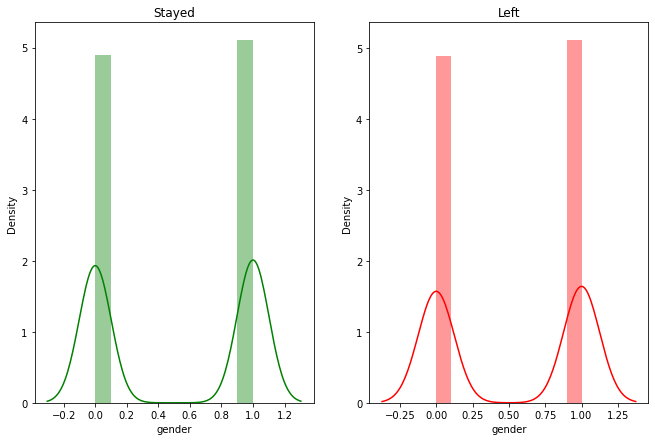

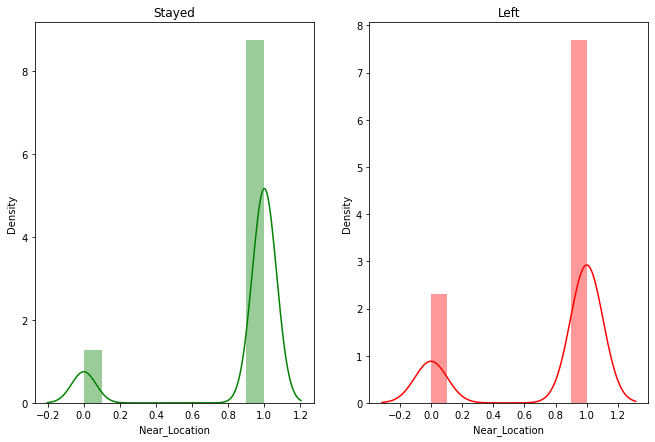

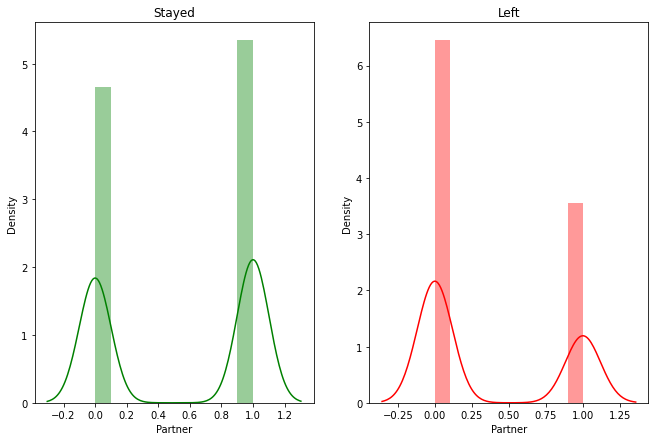

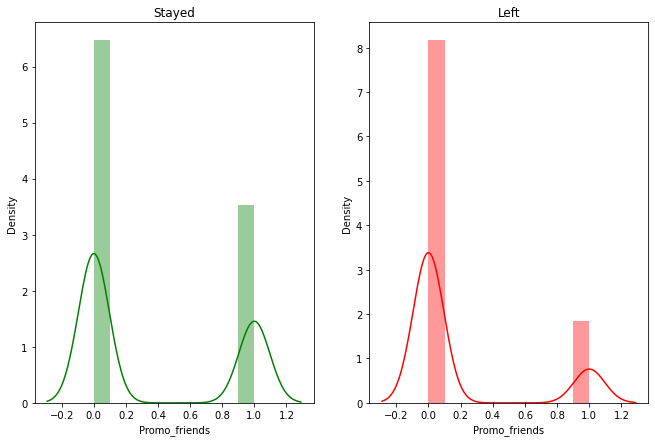

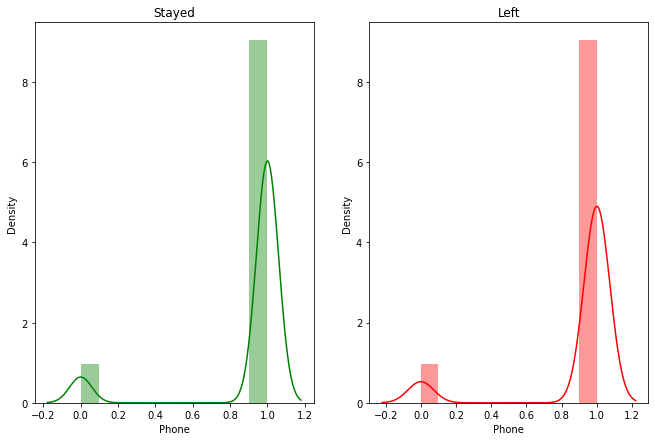

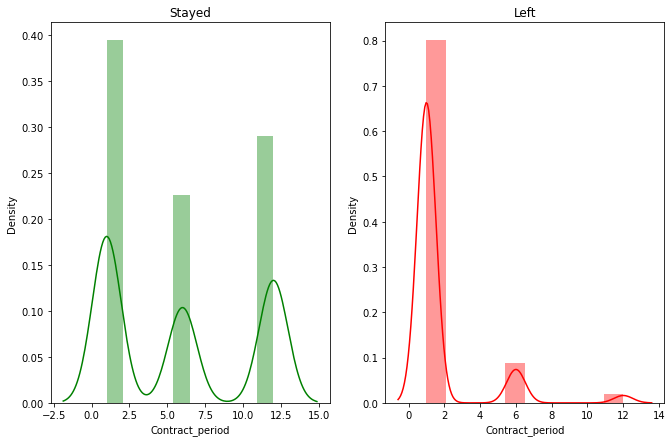

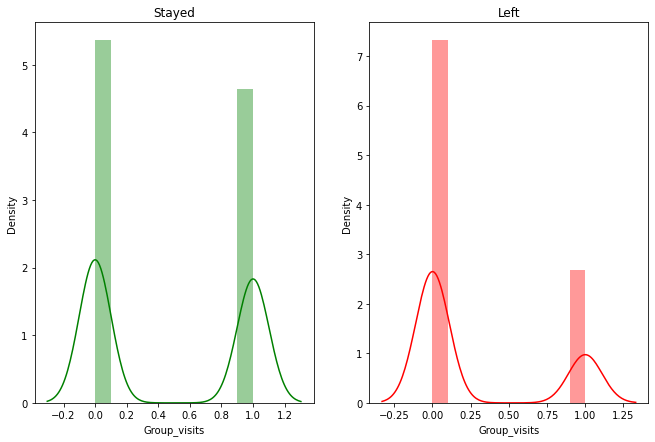

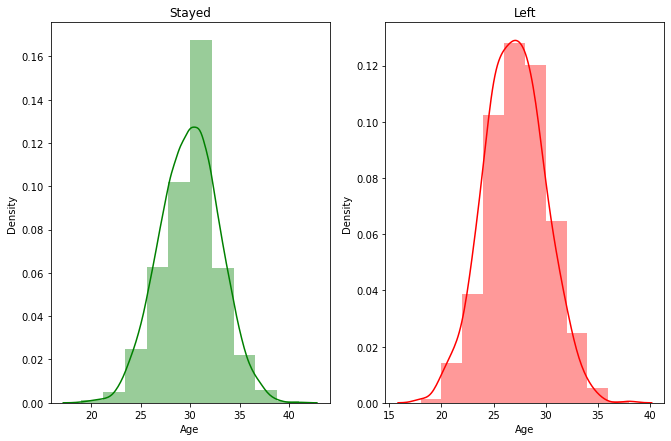

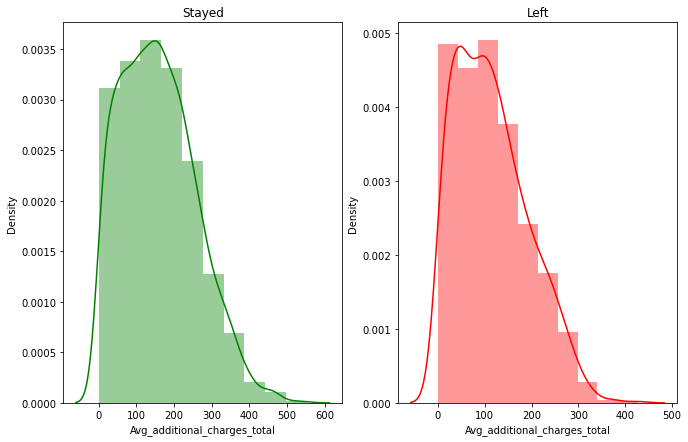

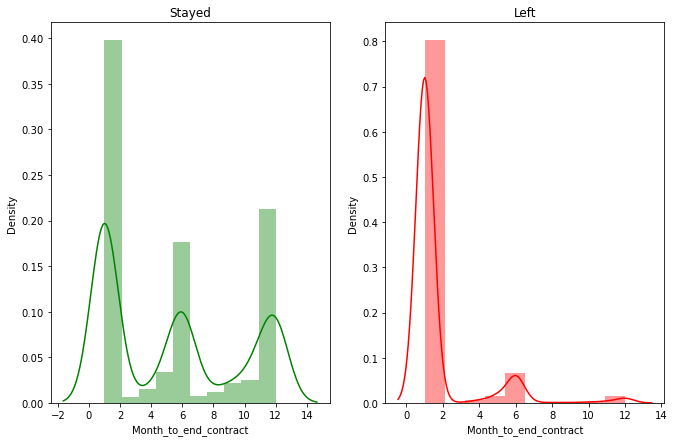

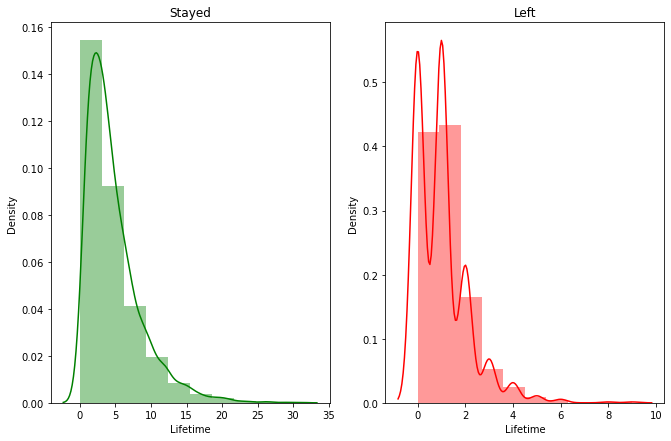

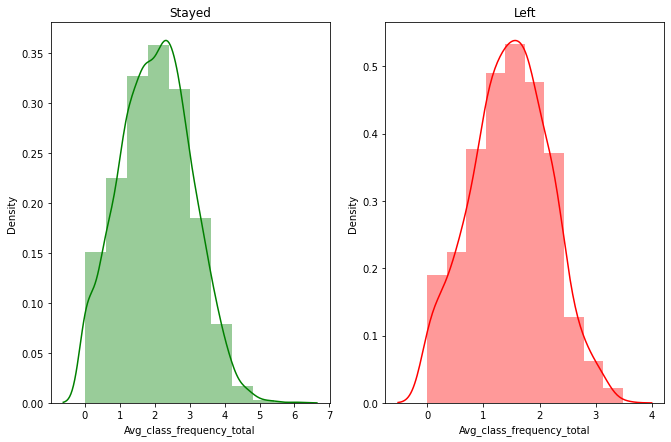

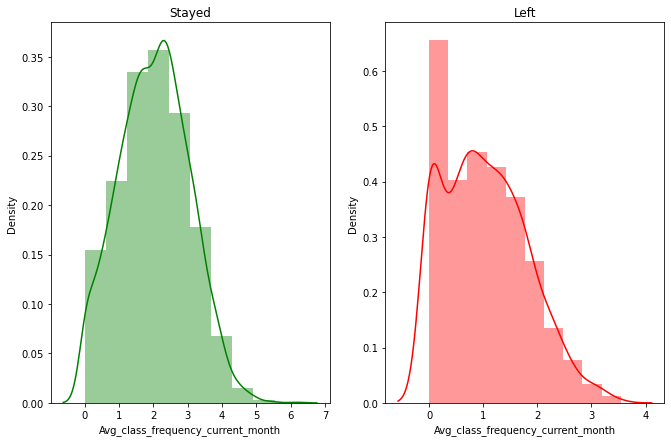

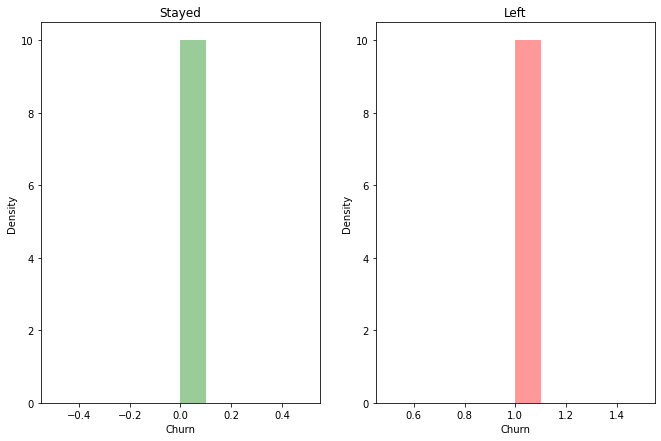

In [18]:
for feature in data.columns:
    fig, ax =plt.subplots(1,2, figsize = (11,7))
    sns.distplot(stay[feature], bins=10, ax=ax[0], color = 'green')
    sns.distplot(left[feature], bins=10, ax=ax[1], color = 'red')
    ax[0].set_title('Stayed')
    ax[1].set_title('Left')
    fig.show() 
    


При сравнении гистограм распределения двух групп можно сделать следующие выводы: 

* клиенты покинувшие спортзал более осторожны при покупке абонементов и не приобретают 6-12 месячные пакеты.

* большинство клиентов обоих групп местные, обе группы в основном представлены людьми среднего возраста 30-35 лет, но остаются всё же люди помоложе.
    
* обе группы тратят на дополнительные покупки в зале одинаковое количество денег 
    
* большинство регулярных клиентов ходят 2-3 раза в неделю, в то время как покинувшие в 60% случаем появлялись реже одного раза в неделю!


 
Для того, чтобы разобраться, как признаки влияют друг на друга, построим матрицу корреляций и отобразим её.


In [19]:
corr = data.corr()

In [2]:
plt.figure(figsize = (15,10))

ax = sns.heatmap(data=corr,linewidth=2,annot = True, square = True, cmap="gist_yarg")
plt.title('Матрица корреляции признаков', fontsize = 20)

plt.show()

NameError: name 'plt' is not defined


Из сильно взаимозависимых признаков стоит выделить связку **"Avg_class_frequency_month и Avg_class_frequency_total"** и **Month_to_end_contract и contract_period"** и оставить только последний.


 <strong><em><h2> Шаг 3. Построим модель прогнозирования оттока клиентов

  </em></strong></h2>


Построим модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце:
    
* Разобьем данные на обучающую и валидационную выборку функцией train_test_split().
    
* Обучим модель на train-выборке двумя способами:
    
 - логистической регрессией
    
 - случайным лесом.
    
* Оценим метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравним по ним модели. 

Ответим на вопрос, какая модель показала себя лучше на основании метрик


Посмотрим, какое соотношение для покинувших клуб и оставшихся


In [21]:
data.Churn.value_counts()

0    2939
1    1061
Name: Churn, dtype: int64

Разделим выборки на тестовую и валидационную


In [22]:
X = data.drop('Churn', axis=1)
y = data['Churn']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify = y
)




Стандартизируем разделенные выборки для применения модели


In [23]:
scaler = StandardScaler()
scaler.fit(X_train)


X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)


    
* Обучим модель на train-выборке логистической регрессией
    



In [24]:
lr_model = LogisticRegression(random_state=0, solver='liblinear')
lr_model.fit(X_train_st, y_train)
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:, 1]


    
* Обучим модель на train-выборке случайным лесом.
    



In [25]:
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)
rf_model.fit(X_train_st, y_train)

RandomForestClassifier(random_state=0)



* Оценим метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравним по ним модели. 



In [26]:
def print_all_metrics(y_true, y_pred, y_proba, title='Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    
print_all_metrics(
    y_test,
    lr_predictions,
    lr_probabilities,
    title='Метрики для модели логистической регрессии:',
)

rf_predictions = rf_model.predict(X_test_st) # Ваш код здесь
rf_probabilities = rf_model.predict_proba(X_test_st)[:, 1] # Ваш код здесь
# выведем все метрики
print_all_metrics(
    y_test,
    rf_predictions,
    rf_probabilities,
    title='Метрики для модели случайного леса:'
)

Метрики для модели логистической регрессии:
	Accuracy: 0.94
	Precision: 0.90
	Recall: 0.85
Метрики для модели случайного леса:
	Accuracy: 0.92
	Precision: 0.88
	Recall: 0.83




<h6>Вывод: </h6>
    
Точность у обеих моделей одинаково высокая, но для нашего случая, когда отнесение клиента к классу 1 не связано с потерей ресурсов параметр recall важнее и по нему модель логистической регресии показала себя лучше.


 <strong><em><h2> Шаг 4. Сделаем кластеризацию клиентов

  </em></strong></h2>


Отложим в сторону столбец с оттоком и проведем кластеризацию объектов (клиентов):
    
* Стандартизируем данные.
    
* Построим матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуем дендрограмму. На основании полученного графика предположим, какое количество кластеров можно выделить.
    
* Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов. Примем число кластеров n=5.
    
* Посмотрим на средние значения признаков для кластеров. Прокомментируем полученные значения.
    
* Построим распределения признаков для кластеров. Прокомментируем полученное распределение.
    
* Для каждого полученного кластера посчитаем долю оттока (методом groupby()). Ответим на вопросы, отличаются ли они по доле оттока, какие кластеры склонны к оттоку, а какие — надёжны?



Отложим в сторону столбец с оттоком и проведем кластеризацию объектов (клиентов) и стандартизируем данные.


In [27]:
step4 = data.drop('Churn', axis = 1)

In [28]:
step4_st = scaler.transform(step4)


* Построим матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуем дендрограмму. На основании полученного графика предположим, какое количество кластеров можно выделить.


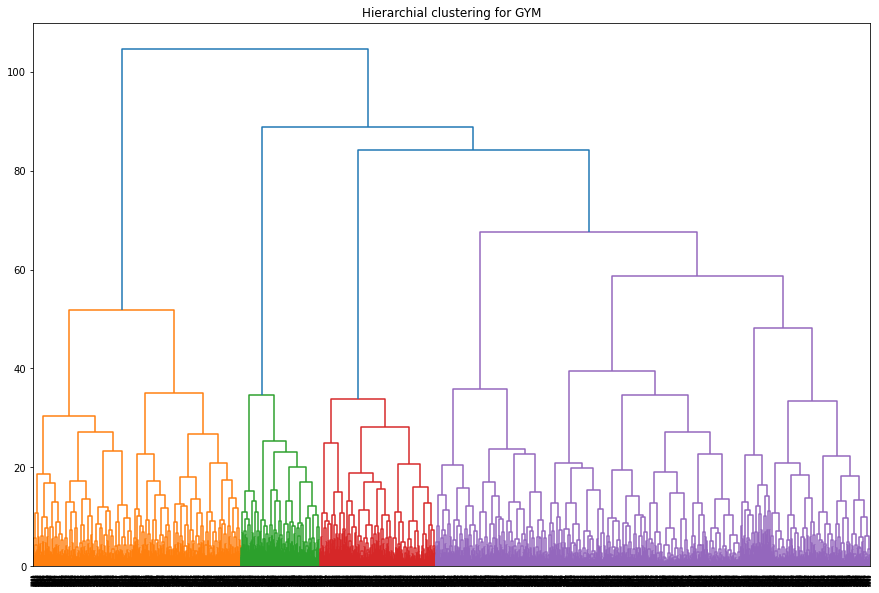

In [29]:
linked = linkage(step4_st, method = 'ward')
plt.figure(figsize=(15, 10))
dendrogram(linked, orientation='top')
plt.title('Hierarchial clustering for GYM')
plt.show()


Предложенное моделью оптимальное число кластеров = 4. Выглядит разумно и подозреваю что основную роль будет играть возраст.



* Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов. Примем число кластеров n=5.


In [30]:
km = KMeans(n_clusters = 5, random_state = 0)



In [31]:
labels = km.fit_predict(step4_st)

In [32]:
data['cluster_km'] = labels


* Посмотрим на средние значения признаков для кластеров. Прокомментируем полученные значения.
    


In [33]:
mean_km = data.groupby('cluster_km').agg('mean')

In [34]:
mean_km

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster_km,,,,,,,,,,,,,,
0,0.495069,0.000000,0.461538,0.078895,1.000000,2.357002,0.216963,28.487179,135.597531,2.203156,2.804734,1.667761,1.486188,0.441815
1,0.483974,1.000000,0.352564,0.238782,1.000000,1.959135,0.341346,28.169872,131.253224,1.866186,2.391827,1.239796,1.003787,0.517628
2,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
3,0.500986,0.959566,0.782051,0.573964,1.000000,10.887574,0.541420,29.979290,160.840516,9.948718,4.716963,1.989812,1.982815,0.027613
4,0.563830,0.978723,0.353428,0.231678,0.998818,2.602837,0.472813,30.092199,161.592147,2.404255,4.962175,2.830272,2.825776,0.070922



Общие показатели для всех групп: все выделенные кластеры одинакового возраста около 30 лет, все разнополые, немного, но примерно одинаково приобретают дополнительных продуктов в фитнес-клубе.
    
* **Группа "Заезжие"**: не местные, которых скорее всего привлекла акция на квартальные абонементы, ради которого "можно и поездить", однако чаще 2 раз в неделю никак не выходит. Достаточно прижимистые граждане, которые мало тратят на дополнительные продукты, однако часть из них проникается культурой и остается на месяцы.
    
* **Группа "Местные самоучки"**: местные, приобретают абонемент самостоятельно, в основном приобретают абонемент каждый месяц или раз в квартал, чаще ходят в тренажерный зал, а не на групповые занятия, ходят в основном 1 раз в неделю, тратят мало - наиболее склонны к оттоку.

* **Середнячки** : все те, кого модель не отнесла по признакам к другим - среднего возраста, в основном местные, иногда используют партнерскую программу, иногда нет, иногда приходят по приглашению с друзьями, иногда нет. Единственный характерный признак:отсутствие телефонного контакта -  либо случайный пропуск сотрудника, оформлявшего абоменемент, либо преднамеренное желание клиента, который не был уверен, что спорт для него. Несмотря на то, что абонементы в основном покупают большие - каждый 4 в группе ушел. 
    
* **Группа "Корпоратив"**: местные клиенты без привязки к полу, ходят по партнерской программе, предоплаченной на большой срок ( 12 месяцев) - скорее всего компания предоставляет сотрудникам такой бонус, чаще используют абонемент для групповых тренеровок. Уже несколько месяцев ходят, в среднем 2 тренеровки в неделю, чуть больше других групп трятят на дополнительные продукты в фитнес клубе. В этой группе срабатывает эффект снежного кома - помимо корпоративной программы людей привлекают друзья-сотрудники которые уже ходят в этот клуб.

    
* **Группа "Фитоняшки"**: наиболее целеустремленные клиенты клуба. Ходят 3 раза в неделю, абонементы берут побольше ( в основном квартальные), пользуются и тренажерным залом и групповыми занятиями, хорошо покупают дополнительные продукты, и в среднем уже полгода в клубе. Холить и лелеять.
       



* Построим распределения признаков для кластеров. Прокомментируем полученное распределение.
    


In [35]:
one = data[data['cluster_km']==0] 
two = data[data['cluster_km']==1] 
three = data[data['cluster_km']==2] 
four = data[data['cluster_km']==3] 
five = data[data['cluster_km']==4] 

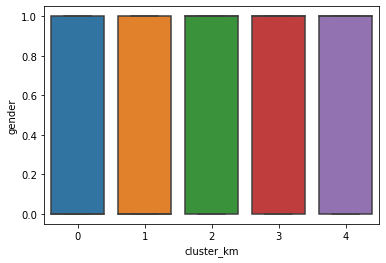

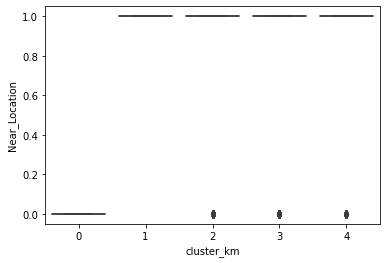

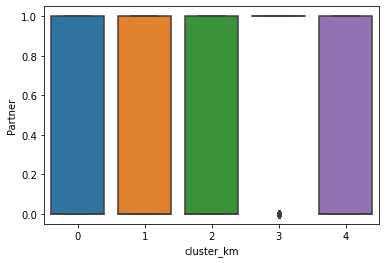

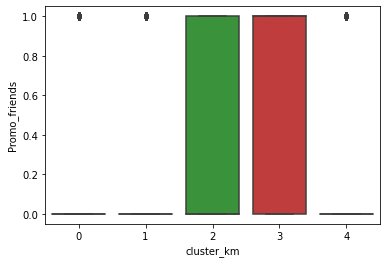

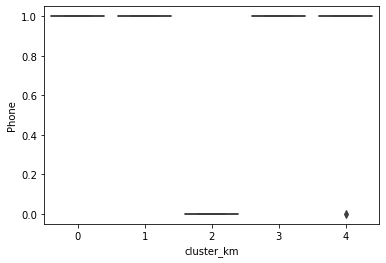

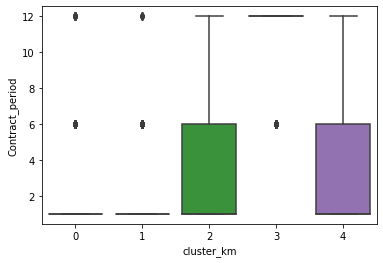

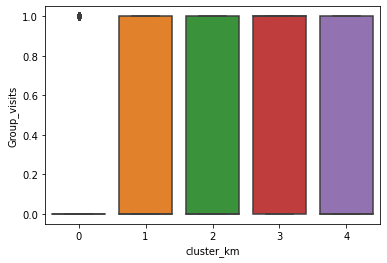

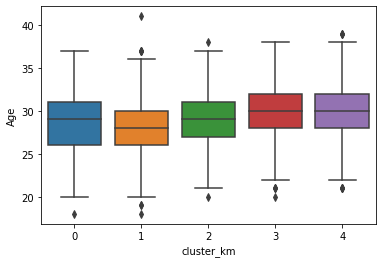

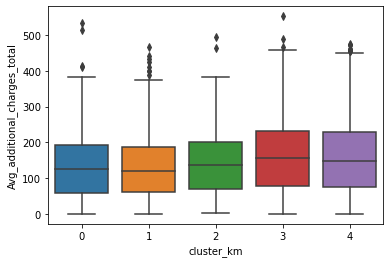

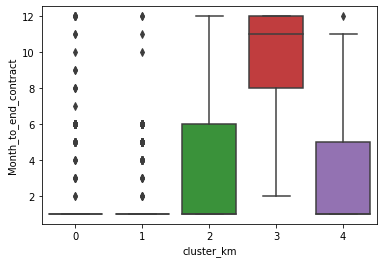

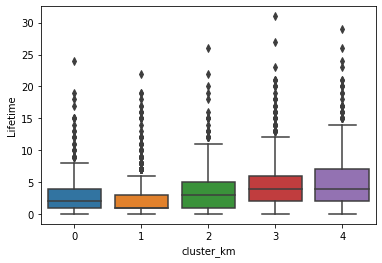

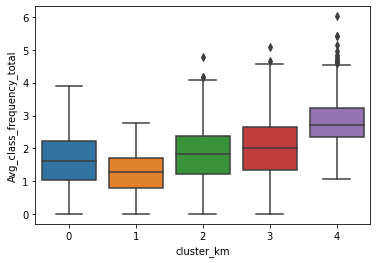

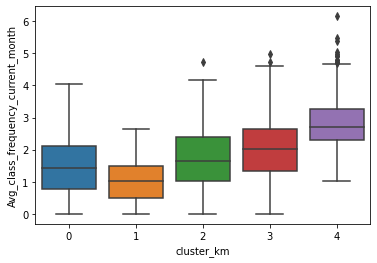

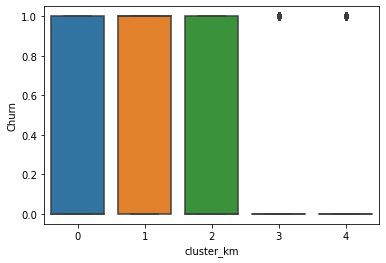

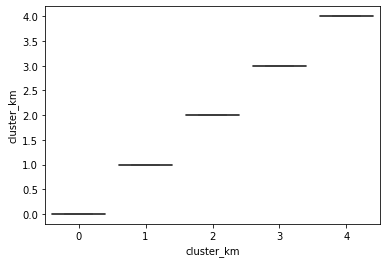

In [36]:
for column in data.columns:
    #fig, ax =plt.subplots(5, figsize = (12,10))
    #plt.subplots_adjust( hspace=0.8)
    sns.boxplot(data = data, x = 'cluster_km', y = column)
    #sns.distplot(two[feature], bins=10, ax=ax[1], color = 'red')
    #sns.distplot(three[feature], bins=10, ax=ax[2], color = 'blue')
    #sns.distplot(four[feature], bins=10, ax=ax[3], color = 'black')
    #sns.distplot(five[feature], bins=10, ax=ax[4], color = 'orange')
    #ax[0].set_title('Group 0')
    #ax[1].set_title('Group 1')
    #ax[2].set_title('Group 2')
    #ax[3].set_title('Group 3')
    #ax[4].set_title('Group 4')
    plt.show() 


    
Общий паттерн определенных ранее групп вырисовывается и на графиках распределения. 




* Для каждого полученного кластера посчитаем долю оттока (методом groupby()). Ответим на вопросы, отличаются ли они по доле оттока, какие кластеры склонны к оттоку, а какие — надёжны?


In [37]:
churn_rate = data[data['Churn'] == 1]
churn_rate.groupby('cluster_km')['Churn'].size() / len(churn_rate)

cluster_km
0    0.211122
1    0.608860
2    0.097078
3    0.026390
4    0.056550
Name: Churn, dtype: float64

  
Самый ненадежный класс: "местные самоучки" - они дают более 60% оттока, остальные 20% оттока для полного принципа Парето дают "заезжие"
    
Постоянные "надежные" клиенты нашего клуба - это корпоративные посетители групповых занятий с годовыми абонементами и "фитоняшки", которые ходят регулярно 3 раза в неделю и покупают квартальные абонементы. 


 <strong><em><h2> Шаг 5. Выводы и базовые рекомендации по работе с клиентами

  </em></strong></h2>

 <strong><em><h3> Выводы
  </em></strong></h2>


1) Обобщенный портрет посетителя нашего фитнес-клуба: это человек среднего возраста около 30 лет. Нет нужды "отапливать космос" и сливать маркетинговый бюджет на привлечение 15-летних парней или 60-летних дедушек - им будет неуютно.
    
2) Независимо от класса, люди мало тратят денег на дополнительные продукты - судя по цифрам речь идет максимум о бутылке воды и фитнес-батончике. Нужно либо расширить ассортимент, либо наоборот свести продукцию до базового минимума. 
    
3) Легенды про киборгов, которые ходят каждый день в спортзал - не более чем легенды. Даже самые преданные посетители спортзала посещают его три раза в неделю. Можно это учитывать при планировании заполняемости основного зала и групповых занятий
</div>

 <strong><em><h3> Базовые рекомендации по работе с клиентами.
  </em></strong></h2>


1) Максимальная лояльность "корпоративному" классу клиентов и "фитоняшкам" для стабильного денежного потока. Так как корпоративные абонементы приобретаются раз в год (скорее всего декабрь-январь), то стоит приурочить к этому событию дополнительные призы и бонусы.

2) Перспективная категория - класс "приведи друга". Несмотря на низкую посещаемость, эти клиенты боятся ударить в грязь лицом перед своими более вовлеченными коллегами, которые и привели их в этот фитнес-центр, и показывают lifetime  в 1.5 раза лучше, чем у местных самоучек,а оттоку подвержены в 6 раз меньше. Но работать стоит не с этими клиентами напряму, а с амбассадорами Вашего спортзала - классом "фитоняшки" - именно они будут привлекать новых клиентов ( скорее всего из числа своих сотрудников) и они же будут мотивировать их продолжать.
    
3) Класс "залетных" из числа неместных - результат промо-акций и скидок. Отток не пугающий, но стоит оценить вложения от рекламы с ltv клиента.
    
4) Местные самоучки - бутылочное горлышко. Они чаще всего сами себе на уме и как в один день решили прийти в спортзал, так в другой день незаметно передумали.  Для них нужна программа вовлечения - возможно бесплатное ознакомительное занятие с тренером, чтобы он начал втягиваться в культуру "фитоняшек", а не ходил особняком с мыслями "мне никогда таким не стать, так нечего и пытаться". Наиболее показателен первый месяц в течение которого у человека вырабатывается положительное закрепление и проявляются результаты от работы в спортзале, либо же он разочаровывается и плавно уходит с радаров. 
</div>